# Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
plt.style.use('ggplot')

# Load and Visualize Dat

In [61]:
df = pd.read_csv('datasets/neural-data.csv')
df.head()

,x1,x2,label
0,0.39,0.00,0
1,1.29,0.00,0
2,1.33,-0.03,0
3,1.59,-0.05,0
4,1.79,-0.03,0


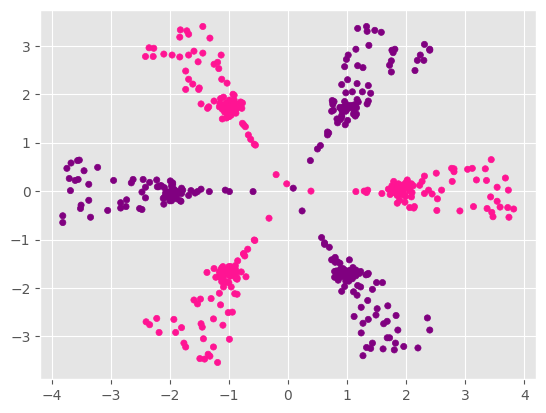

In [62]:
plt.scatter(df["x1"], df["x2"], c=df["label"], cmap=ListedColormap(["deeppink", "purple"]), s=20)
plt.show()

In [63]:
X = df.drop("label", axis=1).values
y = df["label"].values

y = y.reshape(-1, 1)  

In [64]:
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (500, 2)
y.shape: (500, 1)


_______________

# Helper Functions

In [65]:
def initialize_parameters(input_neurons, hidden_neurons, output_neurons):
    np.random.seed(42)
    W1 = np.random.randn(input_neurons, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.randn(hidden_neurons, output_neurons)
    b2 = np.zeros((1, output_neurons))
    return W1, b1, W2, b2

In [66]:
# Let's Visualize an example
initialize_parameters(2,4,1) 

(array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
        [-0.23415337, -0.23413696,  1.57921282,  0.76743473]]),
 array([[0., 0., 0., 0.]]),
 array([[-0.46947439],
        [ 0.54256004],
        [-0.46341769],
        [-0.46572975]]),
 array([[0.]]))

### Activations and Derivative functions

In [67]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

def sigmoid_derivative(A):
    return A * (1 - A)

# We need not Implement `tanh` function as it comes built-in with numpy

def tanh_derivative(a):
    return 1 - np.power(a, 2)

### Forward Propagation Function

In [68]:
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

### Compute Loss Fuction

In [69]:
def compute_loss(y, A2):
    return np.mean((y - A2) ** 2)

### Backward Pass Function

In [70]:
def backward_pass(X, y, Z1, A1, A2, W2):
    m = X.shape[0]
    dA2 = A2 - y
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * tanh_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

### Update Parameters Function

In [71]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

_____________

# Model Training

In [112]:
def train(X, y, hidden_neurons=4, learning_rate=0.03, epochs=6000, print_epochloss=True):
    input_neurons = X.shape[1]
    output_neurons = y.shape[1]

    W1, b1, W2, b2 = initialize_parameters(input_neurons, hidden_neurons, output_neurons)
    epochs_list = []
    losses = []

    for epoch in range(1, epochs+1):
        epochs_list.append(epoch)

        # forward pass
        Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)

        # compute loss
        loss = compute_loss(y, A2)
        losses.append(loss)

        # back prop
        dW1, db1, dW2, db2 = backward_pass(X, y, Z1, A1, A2, W2)

        # update params
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if print_epochloss is True:
        # print loss for every 1000 epochs
            if epoch == 1 or epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, epochs_list, losses

In [113]:
W1, b1, W2, b2, epochs_list, losses= train(X, y, hidden_neurons=4, learning_rate=0.03, epochs=6000)

Epoch 1, Loss: 0.2877
Epoch 1000, Loss: 0.1671
Epoch 2000, Loss: 0.0848
Epoch 3000, Loss: 0.0478
Epoch 4000, Loss: 0.0315
Epoch 5000, Loss: 0.0231
Epoch 6000, Loss: 0.0181


_________________

# Data Visualization

### Loss plot

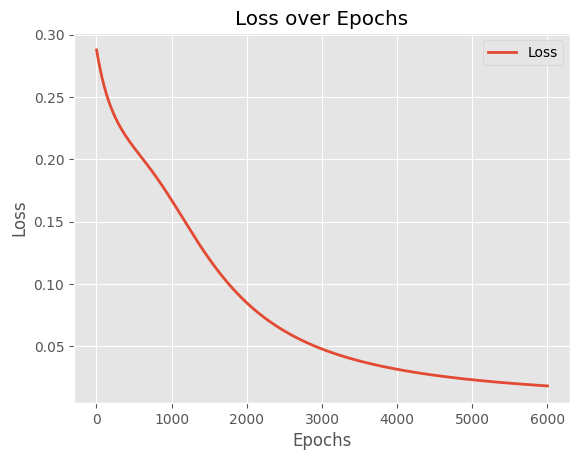

In [90]:
plt.plot(epochs_list, losses, linewidth=2, label="Loss") 

plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

### Decision boundary

In [95]:
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                            np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, A2 = forward_pass(grid, W1, b1, W2, b2)
    Z = (A2 > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(["#ff66cc", "#800080"]), alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=ListedColormap(["#ff66cc", "#800080"]), s=20)
    plt.title("Decision Boundary")
    plt.show()

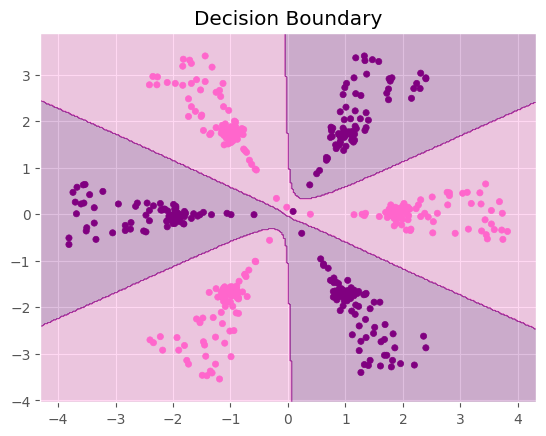

In [96]:
plot_decision_boundary(X, y, W1, b1, W2, b2)

### Decision Boundaries with Varying Hidden Neurons

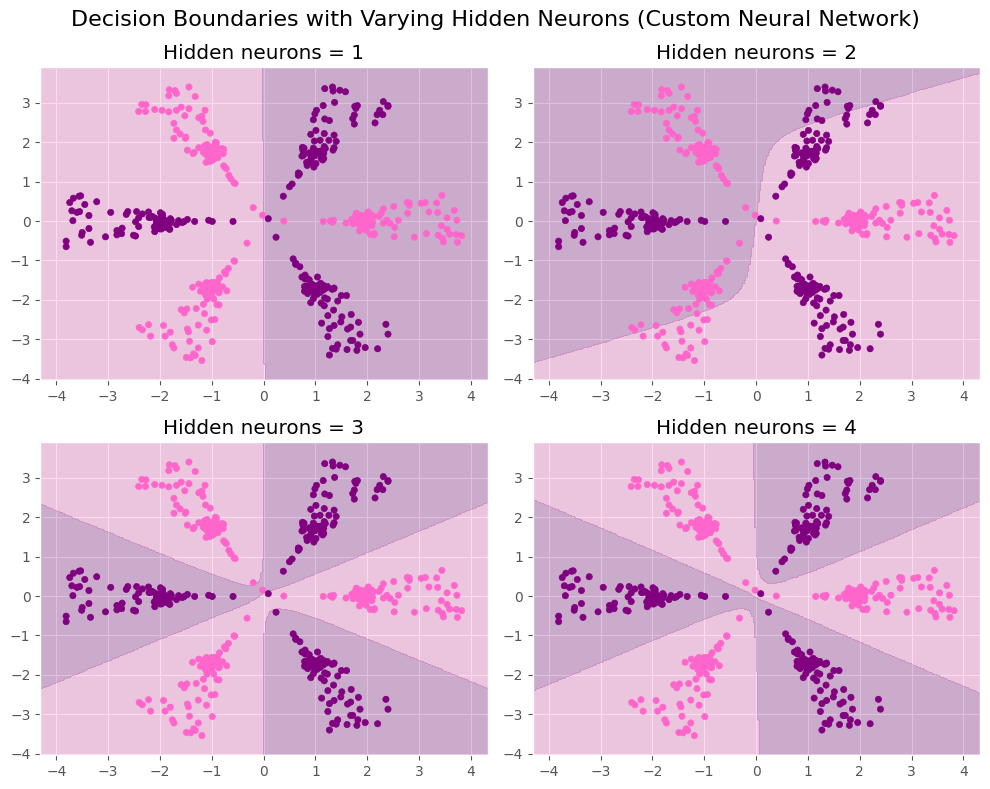

In [ ]:
hidden_neuron_list = [1, 2, 3, 4]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel() 

for i, hidden_neurons in enumerate(hidden_neuron_list):

    W1, b1, W2, b2, epochs_list, losses = train(X, y, hidden_neurons=hidden_neurons, learning_rate=0.03, epochs=6000, print_epochloss=False)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    _, _, _, A2 = forward_pass(grid, W1, b1, W2, b2)
    Z = (A2.ravel() > 0.5).reshape(xx.shape)

    ax = axes[i]
    ax.contourf(xx, yy, Z, cmap=ListedColormap(["#ff66cc", "#800080"]), alpha=0.25)
    ax.scatter(X[:, 0], X[:, 1], c=y.ravel(),cmap=ListedColormap(["#ff66cc", "#800080"]), s=20)
    ax.set_title(f"Hidden neurons = {hidden_neurons}")

fig.suptitle("Decision Boundaries with Varying Hidden Neurons", fontsize=16)
plt.tight_layout()
plt.show()

________